In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

from matplotlib import rcParams

#Set font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
import matplotlib

matplotlib.__version__

'2.1.2'

In [3]:
# Read a dataset for life expectancy from a CSV file hosted online
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
life_expect = pd.read_csv(url)

In [4]:
life_expect.shape

(1704, 6)

In [5]:
life_expect.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [6]:
spain=life_expect[life_expect['country']=='Spain']

In [7]:
spain

,country,year,pop,continent,lifeExp,gdpPercap
1416,Spain,1952,28549870.0,Europe,64.940,3834.034742
1417,Spain,1957,29841614.0,Europe,66.660,4564.802410
1418,Spain,1962,31158061.0,Europe,69.690,5693.843879
1419,Spain,1967,32850275.0,Europe,71.440,7993.512294
1420,Spain,1972,34513161.0,Europe,73.060,10638.751310
1421,Spain,1977,36439000.0,Europe,74.390,13236.921170
1422,Spain,1982,37983310.0,Europe,76.300,13926.169970
1423,Spain,1987,38880702.0,Europe,76.900,15764.983130
1424,Spain,1992,39549438.0,Europe,77.570,18603.064520
1425,Spain,1997,39855442.0,Europe,78.770,20445.298960


In [8]:
life_expect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
year         1704 non-null int64
pop          1704 non-null float64
continent    1704 non-null object
lifeExp      1704 non-null float64
gdpPercap    1704 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [9]:
#cuántos registros hay por año
life_expect['year'].value_counts()

2007    142
2002    142
1997    142
1992    142
1987    142
1982    142
1977    142
1972    142
1967    142
1962    142
1957    142
1952    142
Name: year, dtype: int64

# grouping data for analysis

In [10]:
#agrupamos por año
by_year = life_expect.groupby('year')

In [11]:
#muestra el primer elemento de cada grupo; en este caso es siempre Afghanistan
by_year.first()

,country,pop,continent,lifeExp,gdpPercap
year,,,,,
1952,Afghanistan,8425333.0,Asia,28.801,779.445314
1957,Afghanistan,9240934.0,Asia,30.332,820.853030
1962,Afghanistan,10267083.0,Asia,31.997,853.100710
1967,Afghanistan,11537966.0,Asia,34.020,836.197138
1972,Afghanistan,13079460.0,Asia,36.088,739.981106
1977,Afghanistan,14880372.0,Asia,38.438,786.113360
1982,Afghanistan,12881816.0,Asia,39.854,978.011439
1987,Afghanistan,13867957.0,Asia,40.822,852.395945
1992,Afghanistan,16317921.0,Asia,41.674,649.341395


In [12]:
Afghanistan = by_year.first()

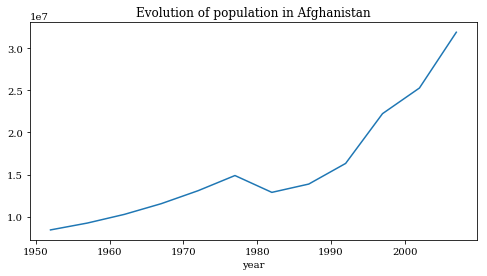

In [13]:
#gráfica de evolución de la población en Afganistan
Afghanistan['pop'].plot(figsize=(8,4), title='Evolution of population in Afghanistan');

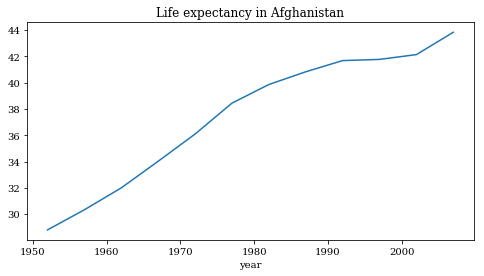

In [14]:
#gráfica de evolución de la esperanza de vida en Afganistan
Afghanistan['lifeExp'].plot(figsize=(8,4), title='Life expectancy in Afghanistan');

In [15]:
Afghanistan.describe()

,pop,lifeExp,gdpPercap
count,1.200000e+01,12.000000,12.000000
mean,1.582372e+07,37.478833,802.674598
std,7.114583e+06,5.098646,108.202929
min,8.425333e+06,28.801000,635.341351
25%,1.122025e+07,33.514250,736.669343
50%,1.347371e+07,39.146000,803.483195
75%,1.779529e+07,41.696250,852.572136
max,3.188992e+07,43.828000,978.011439


In [16]:
#agrupamos por país
by_country = life_expect.groupby('country')

In [17]:
#el primer registro de cada grupo es siempre 1952
year1952 = by_country.first()

In [18]:
type(year1952)

pandas.core.frame.DataFrame

In [19]:
year1952.head()

,year,pop,continent,lifeExp,gdpPercap
country,,,,,
Afghanistan,1952,8425333.0,Asia,28.801,779.445314
Albania,1952,1282697.0,Europe,55.230,1601.056136
Algeria,1952,9279525.0,Africa,43.077,2449.008185
Angola,1952,4232095.0,Africa,30.015,3520.610273
Argentina,1952,17876956.0,Americas,62.485,5911.315053


In [20]:
#población de España en 1952
year1952['pop'].min()

60011.0

## Visualizing the data

In [21]:
#take population values to a numpy array. We will use this to be the size of the bubble
populations = year1952['pop']

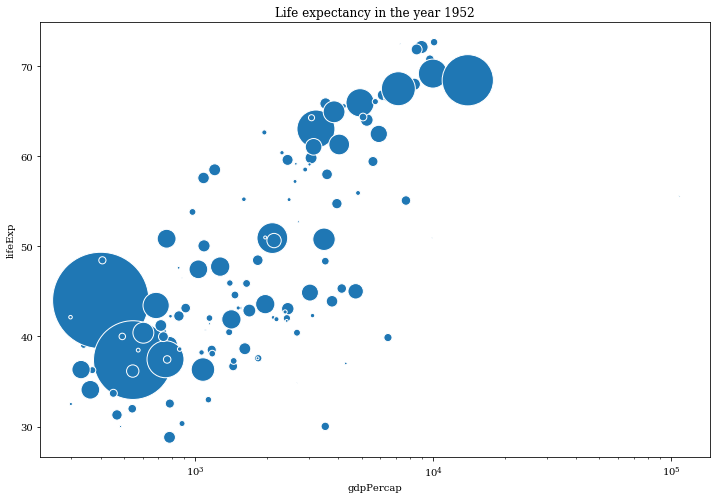

In [22]:
#como los valores son muy grandes vamos a modificarlos antes de usarlos en el gráfico.
#Dividiremos el valor por 60.000 (que es el valor mínimo)
#Además usaremos escala logarítmica para el GDP (eje X)

year1952.plot.scatter(figsize=(12,8),
                     x='gdpPercap',y='lifeExp',s=populations/60000,
                      title='Life expectancy in the year 1952',
                       edgecolors="white")
pyplot.xscale('log');
#matplotlib.axes.Axes.set_xscale('logit')

In [23]:
pd.Categorical(year1952['continent'])

[Asia, Europe, Africa, Africa, Americas, ..., Asia, Asia, Asia, Africa, Africa]
Length: 142
Categories (5, object): [Africa, Americas, Asia, Europe, Oceania]

In [24]:
colors = pd.Categorical(year1952['continent']).codes

In [25]:
print(colors)

[2 3 0 0 1 4 3 2 2 3 0 1 3 0 1 3 0 0 2 0 1 0 0 1 2 1 0 0 0 1 0 3 1 3 3 0 1
 1 0 1 0 0 0 3 3 0 0 3 0 3 1 0 0 1 1 2 3 3 2 2 2 2 3 2 3 1 2 2 0 2 2 2 2 0
 0 0 0 0 2 0 0 0 1 2 3 0 0 2 0 2 3 4 1 0 0 3 2 2 1 1 1 2 3 3 1 0 3 0 0 2 0
 3 0 2 3 3 0 0 3 2 0 0 3 3 2 2 0 2 0 1 0 3 0 3 1 1 1 2 2 2 0 0]


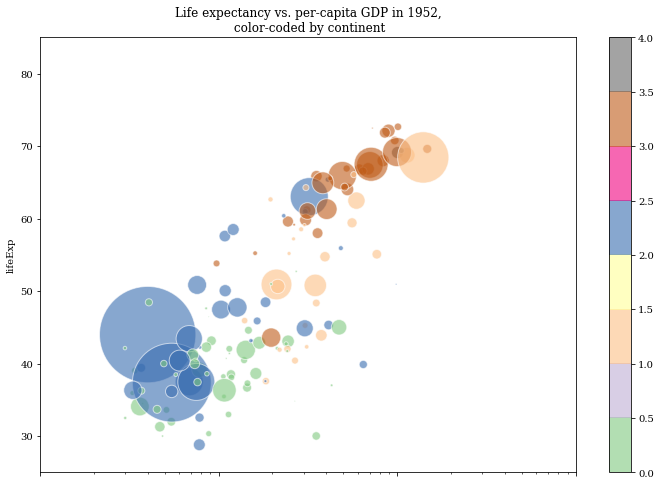

In [26]:
year1952.plot.scatter(figsize=(12,8), 
                         x='gdpPercap', y='lifeExp', s=populations/60000, 
                         c=colors, cmap='Accent',
                         title='Life expectancy vs. per-capita GDP in 1952,\n color-coded by continent',
                         logx = 'True',
                         ylim = (25,85),
                         xlim = (1e2, 1e5),
                         edgecolors="white",
                         alpha=0.6);

## Life expectancy over time

In [27]:
#Usaremos lo que se llama spaguetti plot, con una línea para cada país, es decir, tendremos 142 líneas
#Para cada país tenemos sus datos (agrupados gracias a group_by), el eje x será el tiempo, en el eje y tendremos
#la esperanza de vida

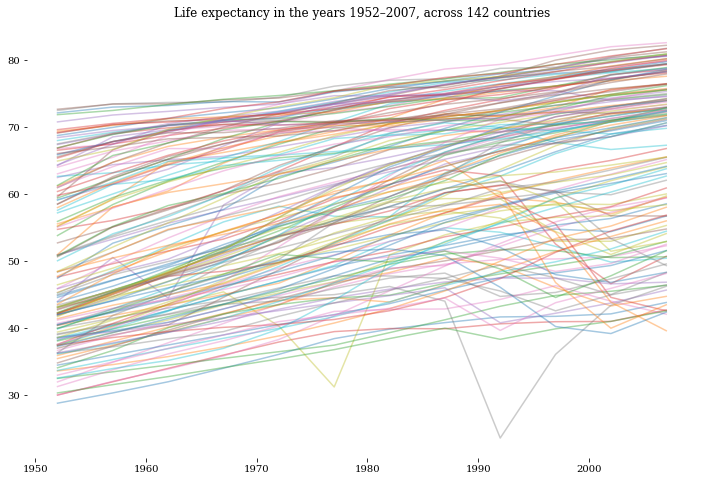

In [30]:
pyplot.figure(figsize=(12,8))

for key,group in by_country:
    pyplot.plot(group['year'], group['lifeExp'], alpha=0.4)
    
pyplot.title('Life expectancy in the years 1952–2007, across 142 countries')
pyplot.box(on=None); #para quitar el recuadro de alrededor

In [29]:
by_country.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
12,Albania,1952,1282697.0,Europe,55.230,1601.056136
13,Albania,1957,1476505.0,Europe,59.280,1942.284244
14,Albania,1962,1728137.0,Europe,64.820,2312.888958
15,Albania,1967,1984060.0,Europe,66.220,2760.196931
16,Albania,1972,2263554.0,Europe,67.690,3313.422188


In [ ]:
#We will investigate the drops in years 1977 and 1992
#first we'll find the minimum lifeExp for each year; next, the country for that lifeExp

In [32]:
#We'll use get_group method of group_by. We will access the data in by_year group. 
#It will return a dataframe with the same columns as the original
min_lifeExp_1977 = by_year['lifeExp'].get_group(1977).min()

In [33]:
min_lifeExp_1977

31.22

In [34]:
min_lifeExp_1992 = by_year['lifeExp'].get_group(1992).min()

In [35]:
min_lifeExp_1992

23.599

In [36]:
#to know the country with that lifeExp we can use the index of the minimum value and then find the coubtry with that index
by_year['lifeExp'].get_group(1977).idxmin()

221

In [41]:
life_expect['country'][221]

'Cambodia'

In [42]:
by_country.get_group('Cambodia')

,country,year,pop,continent,lifeExp,gdpPercap
216,Cambodia,1952,4693836.0,Asia,39.417,368.469286
217,Cambodia,1957,5322536.0,Asia,41.366,434.038336
218,Cambodia,1962,6083619.0,Asia,43.415,496.913648
219,Cambodia,1967,6960067.0,Asia,45.415,523.432314
220,Cambodia,1972,7450606.0,Asia,40.317,421.624026
221,Cambodia,1977,6978607.0,Asia,31.220,524.972183
222,Cambodia,1982,7272485.0,Asia,50.957,624.475478
223,Cambodia,1987,8371791.0,Asia,53.914,683.895573
224,Cambodia,1992,10150094.0,Asia,55.803,682.303175
225,Cambodia,1997,11782962.0,Asia,56.534,734.285170


In [38]:
by_year['lifeExp'].get_group(1992).idxmin()

1292

In [40]:
life_expect['country'][1292]

'Rwanda'

In [43]:
by_country.get_group('Rwanda')

,country,year,pop,continent,lifeExp,gdpPercap
1284,Rwanda,1952,2534927.0,Africa,40.000,493.323875
1285,Rwanda,1957,2822082.0,Africa,41.500,540.289398
1286,Rwanda,1962,3051242.0,Africa,43.000,597.473073
1287,Rwanda,1967,3451079.0,Africa,44.100,510.963714
1288,Rwanda,1972,3992121.0,Africa,44.600,590.580664
1289,Rwanda,1977,4657072.0,Africa,45.000,670.080601
1290,Rwanda,1982,5507565.0,Africa,46.218,881.570647
1291,Rwanda,1987,6349365.0,Africa,44.020,847.991217
1292,Rwanda,1992,7290203.0,Africa,23.599,737.068595
1293,Rwanda,1997,7212583.0,Africa,36.087,589.944505


# interactive visualizations

In [44]:
from ipywidgets import widgets

In [46]:
widgets.IntSlider()

IntSlider(value=0)

In [ ]:
#we'll be using a slider, a plotting function that makes our bubble chart, and the .interact() function to 
#call our plotting function with each value of the slider.

In [47]:
#integer-value slider, from 1952 to 2007, con saltos de 5 en 5
slider = widgets.IntSlider(min=1952, max=2007, step=5)

def roslingplot(year):
#values of population from by_year, for the year in "year"

    populations = by_year.get_group(year)['pop'].values

#scatterplot: x is gdg per capita, y is life expectancy; for each country, values for "year"
    
    by_year.get_group(year).plot.scatter(figsize=(12,8), 
                         x='gdpPercap', y='lifeExp', s=populations/60000, 
                         c=colors, cmap='Accent',
                         title='Life expectancy vs per-capita GDP in the year '+ str(year)+'\n',
                         logx = 'True',
                         ylim = (25,85),
                         xlim = (1e2, 1e5),
                         edgecolors="white",
                         alpha=0.6,
                         colorbar=False,
                         sharex=False)
    pyplot.show();

#call to .interact(), passing our plotting function and the slider value assigned to its argument, year.
widgets.interact(roslingplot, year=slider);

interactive(children=(IntSlider(value=1952, description='year', max=2007, min=1952, step=5), Output()), _dom_classes=('widget-interact',))